<a href="https://colab.research.google.com/github/mebalint/4th_homework/blob/main/4th_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Learning 4th homework**

In [1]:
# installing fiftyone
!pip install fiftyone

     |████████████████████████████████| 1.2 MB 5.4 MB/s 
     |████████████████████████████████| 562 kB 34.3 MB/s 
     |████████████████████████████████| 29.2 MB 1.0 MB/s 
     |████████████████████████████████| 226 kB 44.5 MB/s 
     |████████████████████████████████| 639 kB 36.3 MB/s 
     |████████████████████████████████| 79.9 MB 104 kB/s 
     |████████████████████████████████| 106 kB 47.5 MB/s 
     |████████████████████████████████| 131 kB 47.0 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 13.2 MB 16.4 MB/s 
     |████████████████████████████████| 47.6 MB 1.5 MB/s 
     |████████████████████████████████| 83 kB 1.9 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 78 kB 7.3 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 77 kB 6.3 MB/s 
     |████████████████████████████████| 8.2 MB 19.6 MB/s 
     |████████████████████

In [2]:
# importing packages i need
import fiftyone as fo
import fiftyone.zoo as foz
import os

In [3]:
# reading the dog dataset in (1st category)
dogs = foz.load_zoo_dataset(
    "open-images-v6",
    split="validation",
    classes = ["Dog"],
    max_samples=400,
    dataset_name="dog",
)

 100% |███████████████████| 400/400 [27.8s elapsed, 0s remaining, 12.3 files/s]      
Dataset info written to '/root/fiftyone/open-images-v6/info.json'
Loading 'open-images-v6' split 'validation'
 100% |█████████████████| 400/400 [14.8s elapsed, 0s remaining, 73.4 samples/s]      
Dataset 'dog' created


In [4]:
# reading the car dataset in (2nd category)
cars = foz.load_zoo_dataset(
    "open-images-v6",
    split="validation",
    classes = ["Car"],
    max_samples=400,
    dataset_name="car",
)

Found 7 images, downloading the remaining 393
 100% |███████████████████| 393/393 [28.3s elapsed, 0s remaining, 14.6 files/s]      
Dataset info written to '/root/fiftyone/open-images-v6/info.json'
Loading 'open-images-v6' split 'validation'
 100% |█████████████████| 400/400 [17.9s elapsed, 0s remaining, 50.2 samples/s]      
Dataset 'car' created


In [5]:
# reading the boy dataset in (3rd category)
boys = foz.load_zoo_dataset(
    "open-images-v6",
    split="validation",
    classes = ["Boy"],
    max_samples=400,
    dataset_name="boy",
)

Found 5 images, downloading the remaining 395
 100% |███████████████████| 395/395 [28.5s elapsed, 0s remaining, 13.8 files/s]      
Dataset info written to '/root/fiftyone/open-images-v6/info.json'
Loading 'open-images-v6' split 'validation'
 100% |█████████████████| 400/400 [34.6s elapsed, 0s remaining, 17.2 samples/s]      
Dataset 'boy' created


In [6]:
# exporting the datasets to local folders
dogs.export(
   export_dir="/images/dataset/train/dogs/",
   dataset_type = fo.types.ImageDirectory,
)

 100% |█████████████████| 400/400 [3.1s elapsed, 0s remaining, 175.2 samples/s]      


In [7]:
cars.export(
   export_dir="/images/dataset/train/cars/",
   dataset_type = fo.types.ImageDirectory,
)

 100% |█████████████████| 400/400 [4.5s elapsed, 0s remaining, 122.5 samples/s]      


In [8]:
boys.export(
   export_dir="/images/dataset/train/boys/",
   dataset_type = fo.types.ImageDirectory,
)

 100% |█████████████████| 400/400 [10.6s elapsed, 0s remaining, 46.4 samples/s]      


In [9]:
boys=os.listdir('/images/dataset/train/boys/')
cars=os.listdir('/images/dataset/train/cars/')
dogs=os.listdir('/images/dataset/train/dogs/')

In [10]:
# moving the data
# we want our data in a train-validation-test form,
# where the number of images in the datasets 200-100-100 respectively
import shutil

source_folder = "/images/dataset/train/"
destination_folder = "/images/dataset/validation/"
destination_folder_2 = "/images/test/"
# if we created the directories earlier,
# then the code will run in that case too
if not os.path.isdir("/images/dataset/validation"):
  os.mkdir("/images/dataset/validation")
if not os.path.isdir("/images/test"):
  os.mkdir("/images/test")

# moving the data into the directories
for directory_name in ['boys','cars','dogs']:
  if not os.path.isdir(destination_folder + directory_name):
        os.mkdir(destination_folder + directory_name)
  if not os.path.isdir(destination_folder_2 + directory_name):
        os.mkdir(destination_folder_2 + directory_name)
  # the first 100 samples into the validation folder,
  # the second 100 samples into the test folder
  # the remaining 200 samples stay in the train folder
  for i, file_name in enumerate(os.listdir(source_folder+directory_name)):
    if i<100:
      source = source_folder + directory_name + '/' + file_name
      destination = destination_folder + directory_name + '/' + file_name
      shutil.move(source, destination)
    elif i<200:
      source = source_folder + directory_name + '/' + file_name
      destination = destination_folder_2 + directory_name + '/' + file_name
      shutil.move(source, destination)      


In [11]:
# importing packages
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import backend as K
import numpy as np

In [12]:
# image size is 299x299 in InceptionV3
img_height=299
img_width=299

In [13]:
# importing pretrained model, without the fully-connected layers
base_model = InceptionV3(weights='imagenet', include_top=False)
# we put a global average pooling layer after the last concolutional layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# adding a feedforward layer with activation ReLu
x = Dense(1024, activation='relu')(x)
# and finally adding a last layer, there will be 3 outputs
# - categorical_crossentropy needs this
predictions = Dense(3, activation='softmax')(x)
# creating model
model = Model(inputs=base_model.input, outputs=predictions)

87924736/87910968 [==============================] - 1s 0us/step


In [14]:
for layer in base_model.layers:
    layer.trainable = False

# we do not train the base model, but only the last added layers
# we have 3 categories, so we use loss categorical_crossentropy
model.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')

In [15]:
train_dir = "/images/dataset/train"
validation_dir = "/images/dataset/validation"

In [16]:
# preparing images for loading in and data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_height, img_width), batch_size=20, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(img_height, img_width), batch_size=20, class_mode='categorical')


Found 600 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [17]:
# this function does the data augmentation and trains the network at the same time
model.fit_generator(train_generator,steps_per_epoch=200,validation_data=validation_generator,validation_steps=10,epochs=3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/3
200/200 [==============================] - 42s 130ms/step - loss: 0.5189 - accuracy: 0.8317 - val_loss: 0.2170 - val_accuracy: 0.9300


In [18]:
# we have a look at the structure of the network
print("Convolutional layers of Inception V3:")
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

Convolutional layers of Inception V3:
0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normal

In [19]:
# we are setting layers from 173 trainable
for layer in model.layers[:172]:
       layer.trainable = False
for layer in model.layers[172:]:
       layer.trainable = True

In [20]:
# we have to compile the network again, the upper layers of Inception V3 are learning now
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), metrics=['accuracy'], loss='categorical_crossentropy')

In [21]:
# training
model.fit_generator(train_generator,steps_per_epoch=200,validation_data=validation_generator,validation_steps=10,epochs=3)
print("Training over.")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/3
200/200 [==============================] - 36s 136ms/step - loss: 0.4331 - accuracy: 0.8833 - val_loss: 0.1357 - val_accuracy: 0.9600
Training over.


In [22]:
# predicting for test dataset
predicts=[]
for category_name in ['boys', 'cars', 'dogs']:
  for image_name in os.listdir('/images/test/' + category_name):
      pred_vector=np.array([0,0,0])
      img_path = '/images/test/' + category_name + '/' + image_name
      img = image.load_img(img_path, target_size=(299, 299))
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      x = preprocess_input(x)
      preds = model.predict(x)
      predicts.append(np.argmax(preds,axis=1))

In [23]:
# reshaping predicts into a vector form
predicts=np.asarray(predicts).reshape((300))

In [24]:
# creating the right labels for the categories
boy_array=np.zeros(100)
car_array=np.ones(100)
dog_array=np.ones(100)*2
y_test=np.concatenate((boy_array, car_array), axis=0)
y_test=np.concatenate((y_test, dog_array), axis=0)

In [25]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [26]:
#making confusion matrix with data: predictions and test data 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
conf=confusion_matrix(y_test,predicts)

#https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix

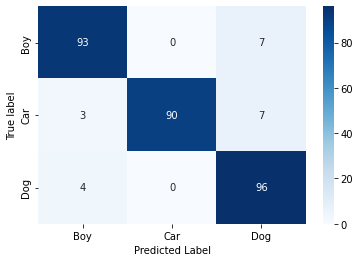

In [27]:
# printing the confusion matrix out
import matplotlib.pyplot as plt
import seaborn as sns;
axis_labels = ['Boy', 'Car', 'Dog']
ax = sns.heatmap(conf, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=axis_labels, yticklabels=axis_labels)
ax.set(xlabel='Predicted Label',
       ylabel='True label');

In [28]:
# printing metrics out
print("test accuracy: %g" %(accuracy_score(y_test, predicts)))
print("Precision", precision_score(y_test, predicts, average="macro"))
print("Recall", recall_score(y_test, predicts, average="macro"))
print("f1_score", f1_score(y_test, predicts, average="macro"))

test accuracy: 0.93
Precision 0.9342424242424242
Recall 0.93
f1_score 0.9305513784461154


In [ ]:
import gc
gc.collect()

29246